In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [19]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [20]:
df['Total_Rooms'] = df['Rooms'] + df['Bedroom2'] + df['Bathroom']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [22]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Total_Rooms
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000,26631.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306,7.810334
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313,2.431726
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000,2.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000,6.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000,8.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000,10.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000,45.000000


In [23]:
miss_values = pd.concat([
    df.isnull().sum(),
    df.count(),
    (df.isnull().sum() * 100 / len(df)).round(2)
],
axis = 1,keys=["Missing Values","Present Values","Percent Missing values"]).sort_values(by="Percent Missing values",ascending=False)

miss_values

,Missing Values,Present Values,Percent Missing values
BuildingArea,21115,13742,60.58
YearBuilt,19306,15551,55.39
Landsize,11810,23047,33.88
Car,8728,26129,25.04
Total_Rooms,8226,26631,23.60
Bathroom,8226,26631,23.60
Bedroom2,8217,26640,23.57
Lattitude,7976,26881,22.88
Longtitude,7976,26881,22.88
Price,7610,27247,21.83


In [24]:
df = df.drop(['BuildingArea','YearBuilt'],axis=1)
df.drop_duplicates(keep='first',inplace=True)
df.dropna(subset=['Price'], inplace=True)

In [25]:
SKEW_THRESHOLD = 1.0

numeric_cols = df.select_dtypes(include = 'number').columns


for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Skipping {col}: Contains negative values.")
        continue
    skew_b = df[col].skew()
    if skew_b > SKEW_THRESHOLD:
        df[col] = np.log1p(df[col])
        skew_a= df[col].skew()
        print(f"Applied np.log1p to {col}: Skew reduced from {skew_b:.3f} to {skew_a:.3f}")

Applied np.log1p to Price: Skew reduced from 2.589 to 0.336
Applied np.log1p to Distance: Skew reduced from 1.479 to -0.400
Applied np.log1p to Postcode: Skew reduced from 3.982 to 3.584
Applied np.log1p to Bathroom: Skew reduced from 1.285 to 0.509
Applied np.log1p to Car: Skew reduced from 1.639 to -0.425
Applied np.log1p to Landsize: Skew reduced from 90.443 to -2.014
Skipping Lattitude: Contains negative values.
Applied np.log1p to Propertycount: Skew reduced from 1.015 to -0.693


In [26]:
categorical_cols= df.select_dtypes(include = 'object')

IMBALANCE_THRESHOLD = 0.7

delete_col = []
for col in categorical_cols:
    counts = df[col].value_counts(normalize = True)*100
    max_prop = counts.max() / 100
    if max_prop >=IMBALANCE_THRESHOLD:
        delete_col.append(col)

delete_col

[]

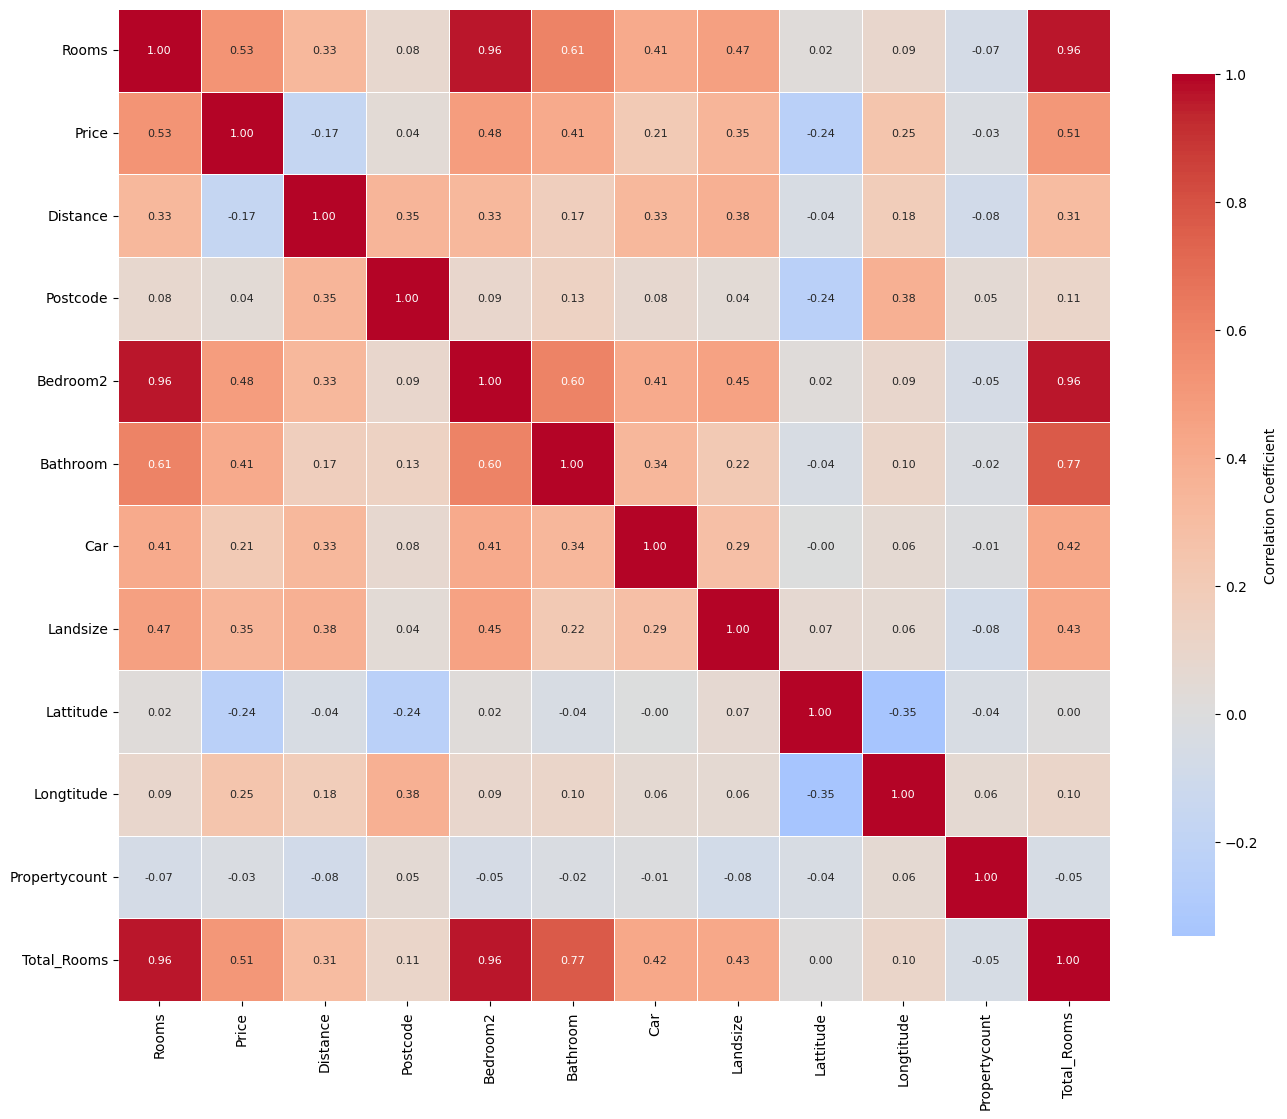

In [27]:
num_corr = df.corr(numeric_only=True)

plt.figure(figsize=(16,14))
sns.heatmap(num_corr, 
            cmap='coolwarm',  
            center=0, 
            annot=True,  
            fmt='.2f', 
            square=True,  
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 8}) 
plt.show()

In [28]:
anova_res = []
MIN_SAMPLES = 5

for col in numeric_cols:
    if col not in df.columns:
        continue
    counts = df[col].value_counts()
    valid_cat = counts[counts >= MIN_SAMPLES].index
    if len(valid_cat) < 2:
        continue
    groups = [
        df.loc[df[col] == cat, 'Price'].dropna()
        for cat in valid_cat
    ]
    groups = [g for g in groups if len(g) >= 2]
    if len(groups) < 2:
        continue
    f_stat, _ = f_oneway(*groups)
    anova_res.append({'Feature': col, 'Correlation': f_stat, 'Type': 'Categorical'})

cat_corr_df = pd.DataFrame(anova_res)
cat_corr_df

d:\Projects\Melbourne-Housing-Market\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Feature,Correlation,Type
0,Rooms,1437.789936,Categorical
1,Price,inf,Categorical
2,Distance,42.875225,Categorical
3,Postcode,76.150943,Categorical
4,Bedroom2,899.083453,Categorical
5,Bathroom,754.296416,Categorical
6,Car,247.775934,Categorical
7,Landsize,5.341980,Categorical
8,Lattitude,1.612505,Categorical
9,Longtitude,1.539903,Categorical


In [29]:
X = df.drop(['Price'],axis = 1)
y = df['Price']

num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 48)

num_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

cat_preprocessor = Pipeline([
    ('imputer' , SimpleImputer(strategy = 'most_frequent')),
    ('encoder' , OneHotEncoder(drop='first',sparse_output=True,handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num',num_preprocessor,num_cols),
    ('cat',cat_preprocessor,cat_cols)
])

X_train_t = transformer.fit_transform(X_train)
X_test_t = transformer.transform(X_test)

d:\Projects\Melbourne-Housing-Market\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
model = LinearRegression()

model.fit(X_train_t,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred = model.predict(X_test_t)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MAE: 0.3290
Test RMSE: 0.5736
Test R²: 0.2872


In [ ]:
dt = DecisionTreeRegressor(random_state=42)


grid_dt = {
    'criterion' : ['squared_error', 'friedman_mse', 'poisson'],
    'max_depth' : [8,10,15],
    'min_samples_leaf' : [1,3,5,8,10]
}

grid_search_dt = GridSearchCV(dt,grid_dt,cv=5,scoring='r2')

grid_search_dt.fit(X_train_t,y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 5, ...], 'min_samples_leaf': [1, 3, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'poisson'


In [34]:
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(X_test_t)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE : {mse:.2f}\n R2 : {r2:.2f}")

MSE : 0.06
 R2 : 0.78


In [ ]:
rf = RandomForestRegressor(random_state=42,bootstrap=True)

In [39]:
rf = RandomForestRegressor(random_state=42,bootstrap=True,criterion = 'squared_error',max_depth = 5,min_samples_split=3,min_samples_leaf=2)

rf.fit(X_train_t,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,3
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
y_pred_rf = rf.predict(X_test_t)
r2_r = r2_score(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred)
print(f"MSE : {mse_r:.2f}\n R2 : {r2_r:.2f}")


MSE : 0.06
 R2 : 0.78
